In [1]:
from typing import List
import itertools
import random

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
import time

In [63]:
X_DIM=16
Y_DIM=16

def get_new_seed():
    return random.randint(0,2**(X_DIM*Y_DIM)-1)

def int2hex(integer: int):
    return hex(integer)

def int2bin(integer: int):
    return bin(integer)[2:].rjust((X_DIM*Y_DIM),'0')

def bin2int(binary: str):
    return int(binary, 2)

def binary2matrix(seed: str):
    str_matrix = [list(seed[i:i+X_DIM]) for i in range(0, len(seed), X_DIM)]
    matrix = np.array(str_matrix, dtype=int)
    return matrix

def matrix2binary(matrix: np.array):
    int_list = list(itertools.chain(*matrix.tolist()))
    str_list = [str(x) for x in int_list]
    bin_num = ''.join(str_list)
    return bin_num

def next_epoc(matrix: np.array):
    kernel = np.array([[1, 1, 1], 
                       [1, 0, 1], 
                       [1, 1, 1]], dtype=int)
    matrix_convolved = ndimage.convolve(matrix, kernel, mode="constant", cval=0)
    return (matrix & (matrix_convolved == 2) | (matrix_convolved == 3)) | ((matrix == 0) & (matrix_convolved == 3))

def game(initial_matrix: np.array, epochs: List[np.array]):
    game_steps = [initial_matrix]
    
    curr_epoc_matrix = initial_matrix
    for e in range(epochs):
        curr_epoc_matrix = next_epoc(curr_epoc_matrix)
        game_steps.append(curr_epoc_matrix)
        
    return game_steps

def game_as_seeds(game: List[np.array]):
    seeds = [bin2int(matrix2binary(x)) for x in game]
    return seeds

def find_loop(game):
    visited = {}
    pruned_game = []
    
    last_e = game[0]
    for e in game:
        pruned_game.append(e)
        if e in visited:
            if e == last_e:
                return "Dead", pruned_game  # dead game
            else:
                return "Loop", pruned_game  # loop game
        else:
            visited[e] = 1
        last_e = e
    
    return "Live", game  # end of game (not enough epochs)


def full_game(matrix: np.array):
    last_seed = bin2int(matrix2binary(matrix))
    
    visited = {last_seed: 1}
    game = [matrix]
    
    while(True):
        matrix = next_epoc(matrix)
        curr_seed = bin2int(matrix2binary(matrix))
        game.append(matrix)
        if curr_seed in visited:
            if curr_seed == last_seed:
                return False, game  # dead game
            else:
                return True, game  # loop game
        else:
            visited[curr_seed] = 1
        last_seed = curr_seed

def play_game_jupyter(epochs: List[np.array], sleep_time: float = 0.2, play_loop: bool = False):
    hdisplay = display("", display_id=True)
    for e in epochs:    
        hdisplay.update(plot_matrix(e))
        clear_output(wait=True)
        plt.pause(sleep_time)
        
    if play_loop:
        seeds = game_as_seeds(epochs)
        start_loop = seeds.index(seeds[-1])
        i = start_loop
        while(True):
            display(plot_matrix(epochs[i]))
            clear_output(wait=True)
            plt.pause(sleep_time)
            i += 1
            if i >= len(epochs):
                i = start_loop
        

def plot_matrix(matrix: np.array):
    return plt.matshow(matrix)

In [3]:
new_seed = get_new_seed()
new_seed_hex = int2hex(new_seed)
new_seed_binary = int2bin(new_seed)

print(f"Seed:\t{new_seed}\nHex:\t{new_seed_hex}\nBinary:\t{new_seed_binary}")

matrix = binary2matrix(new_seed_binary)
matrix

Seed:	104853892478813147635611123902121692042587318300043708408927897055062502599412
Hex:	0xe7d133350f2f1fa74a445a531ba5f6d9ca49ac866a7f9375fb5d8dc4c68aeaf4
Binary:	1110011111010001001100110011010100001111001011110001111110100111010010100100010001011010010100110001101110100101111101101101100111001010010010011010110010000110011010100111111110010011011101011111101101011101100011011100010011000110100010101110101011110100


array([[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0]])

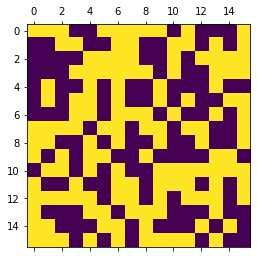

In [4]:
plot_matrix(matrix)

# All the flow

In [5]:
loop_seed      = 23365099472693919232347993412461170186031969760301130127155803834818682085321
long_seed      = 81156254641836879433394239608735817102309349725355861931531537613268553353904
cool_seed      = 79926170627531168404449657046152880880918417967355892324323689681501137392098
very_long_seed = 58717344385062758529092605279421734620552252199362857652611519070635302304969
very_long_loop = 105402040775036926010388705171580729911939687961588852845580646027030158639800
soo_long_seed  = 39850782287162561046272883387700514772775927679536979900119824852620180240364
soo_long_loop  = 98948501407745714947261463308806991015268822587067096436970376107740676113084
noso_long_loop = 63179337366323884046774072193627839068906818862728028060147193958707648889371
long_loop_3    = 99491628755488741960771100352391403077327031715678699382903656505811883593681

In [77]:
new_seed = get_new_seed()
new_seed_binary = int2bin(new_seed)
matrix = binary2matrix(new_seed_binary)

is_loop, conway_game = full_game(matrix)
game_seeds = game_as_seeds(conway_game)

print("Seed: ", new_seed)
print("Hex:  ", int2hex(new_seed))
print("Epochs: ", len(conway_game))
print("Loop?: ", is_loop)
print("Loop lenght: ", len(game_seeds) - game_seeds.index(game_seeds[-1]) - 2)

Seed:  43932068732355611159417661161394316673043962370585227026786765786739443301643
Hex:   0x6120ab738b7560e92c042d4f4dcecbb5d8fa6dbc50af54afd7fec0e46a80fd0b
Epochs:  28
Loop?:  True
Loop lenght:  1


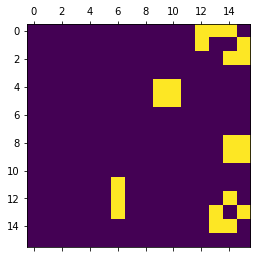

In [79]:
try:
    play_game_jupyter(conway_game, sleep_time=0.05, play_loop=is_loop)
except KeyboardInterrupt:
    pass

In [140]:
game_seeds

[79926170627531168404449657046152880880918417967355892324323689681501137392098,
 50674089024598104041838265091436529497563334620159948705344187272609191252987,
 43472587914288752423190885334851510234151994944123380324802647711520464788467,
 54490644698021488211886856016547456253370368074346632594958354649572903739363,
 45415948216849804334363729042834094319457307045685984864118793188835798013923,
 28977479720935527484724189192962432971431633357615801600791862896284139776547,
 28976961935314953105968990555450656387347511189842101975653047723378047450115,
 43437073837580525862688636631579459414574994122519125498181800951578795179555,
 28998537657300536608585075418310202688984806560613098437603412232578267348515,
 1001027575424609302301214413764755142999042687278708344791693260464700227075,
 1300897083261955432130957296122021365594983798599510831007099670205334518787,
 198332474563635723762432160940418159317039424366788388431789689509419113475,
 1981118890755233780645962188686147999157801

# Some Stats

In [156]:
import pandas as pd

In [225]:
stats_seeds = [get_new_seed() for _ in range(10**4)]

stats_data = []
for s in stats_seeds:
    new_seed_binary = int2bin(s)
    matrix = binary2matrix(new_seed_binary)

    is_loop, conway_game = full_game(matrix)
    game_seeds = game_as_seeds(conway_game)

    data = {}
    data["seed"] = s
    data["last_seed"] = game_seeds[-1]
    data["epochs"] = len(conway_game)
    data["is_loop"] = is_loop
    data["loop_lenght"] = len(game_seeds) - game_seeds.index(game_seeds[-1]) - 2
    stats_data.append(data)

In [226]:
df = pd.DataFrame(stats_data)

In [227]:
df["is_loop"].mean()

0.3272

In [228]:
df.groupby("is_loop")[["epochs", "loop_lenght"]].mean()

,epochs,loop_lenght
is_loop,,
False,75.948127,0.000000
True,75.607274,1.069071


<AxesSubplot:>

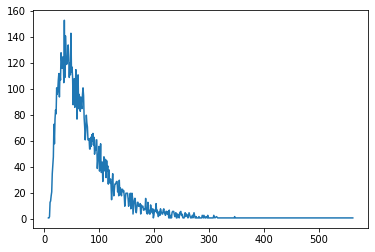

In [229]:
df["epochs"].value_counts().sort_index().plot()

In [230]:
df.sort_values("epochs", ascending=False)["seed"]

9941    1894537477485910865663978277610584715861465818...
728     1785231070179688524998800441949561438698864781...
2854    5048281519683769032136487101131702271881153925...
2132    9305682676535270666577335944604220368907013777...
7879    8638111974559352792031308205738735391869289121...
                              ...                        
2790    4053969951522248829485833766769663621284449570...
3700    9376999972860195336964344333126613448218864250...
2145    2263683882189158402031467384890662811890480793...
6984    6311020630424369736139354146101007131754375105...
2395    5113276756208563101370531994075424113319461965...
Name: seed, Length: 10000, dtype: object

In [231]:
df["loop_lenght"].value_counts().sort_index()

0     6728
1     3123
2      126
5       22
13       1
Name: loop_lenght, dtype: int64

In [232]:
df.sort_values("loop_lenght", ascending=False)

,seed,last_seed,epochs,is_loop,loop_lenght
5411,7081083627678933832247848158218357475756521919...,1402193987310211818999410774812604910617757848...,37,True,13
3299,2746208019518873589941836478665076670239275076...,2415611221376697325602164551796958908422792841...,51,True,5
994,2550863584769497840394700444080987096207353339...,2730864057835788447037894531032925354082354812...,76,True,5
1771,1155181504202516800337617471309492791059965720...,2897320077643394313509041048912968626774938314...,27,True,5
5857,5271990616775991648843848235870781007164845379...,3213925129123577097840813946556527664206366411...,104,True,5
...,...,...,...,...,...
3965,5410599629320841098025179043637109245048079097...,6318833916396086741291614178745766408889857056...,80,False,0
3964,1113525284140625515128150857668981283330256827...,2588194378583834509297011839562314246852573639...,23,False,0
3963,4473629704357851360386451037698782997083974171...,1226043201458733879142446771826937216148288662...,38,False,0
3962,4943650467739062561562318315460498302149077454...,1901504914562014853345247756288,25,False,0


In [233]:
df[df["loop_lenght"] == 3]["seed"].values

array([], dtype=object)